In [64]:
from google.colab import files

In [65]:
uploaded = files.upload()

Saving gruposEconomicos.csv to gruposEconomicos (1).csv


In [66]:
import pandas as pd
import io

data = pd.read_csv('gruposEconomicos.csv', sep=';' , encoding='latin-1')

data.head(5)

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1,0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2,0,3,1,...,221.893,3.509.949,3.577.970,18.949.015.666,17.928.760.492,3.688.293.052,3.699.748.891,588.975.950,667.872.172,NaN
1,2,2,0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45,42,17,19,...,4.339.679,796.827,945.874,6.417.335.168,6.436.090.837,1.878.733.441,1.955.377.497,127.087.663,190.328.750,NaN
2,3,3,0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4,5,20,3,...,1.617.778,0,0,3.448.646.302,3.343.835.273,2.427.005.282,2.314.556.018,144.524.011,139.310.219,NaN
3,4,5,1,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2,0,9,0,...,86.918,4.785.739,5.678.838,6.014.463.154,5.334.073.117,784.042.300,791.999.072,206.200.661,234.359.513,NaN
4,5,4,-1,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8,0,0,0,...,237.591,0,0,3.286.786.210,3.616.608.480,2.426.480.097,2.305.837.270,202.204.211,152.342.627,NaN


### Generar gráfico de barras de solo las empresas que han mejorado y/o empeorado su ranking con respecto al año anterior

In [67]:
grupos_mejor = 0
grupos_peor = 0
for i in data.index:
  if data['Variación Ranking Tamaño 2020 - 2021'][i] > 0:
    grupos_mejor += 1
  elif data['Variación Ranking Tamaño 2020 - 2021'][i] < 0:
    grupos_peor += 1

In [68]:
print(grupos_mejor)
print(grupos_peor)

164
122


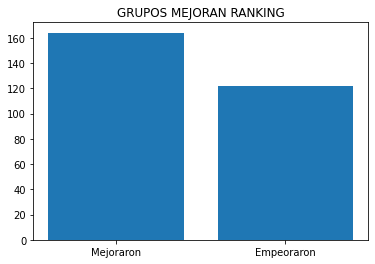

In [69]:
import matplotlib.pyplot as plt

x = ['Mejoraron', 'Empeoraron']
y = [grupos_mejor, grupos_peor]

plt.title('GRUPOS MEJORAN RANKING')

plt.bar(x, y)

plt.show()

### Generar gráfico de las empresas que tienen panamá papers

In [73]:
panama_papers = 0
for i in data.index:
  if data['No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***)'][i] > 0:
    panama_papers += 1
print(panama_papers)
print(len(data))

58
302


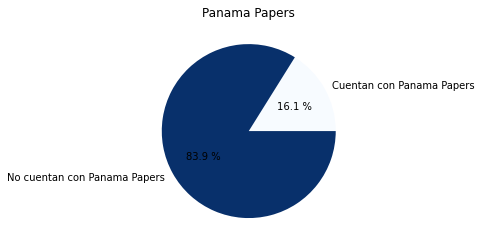

In [74]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm

pesos = [panama_papers, len(data)]
categorias = ["Cuentan con Panama Papers","No cuentan con Panama Papers"]

normdata = colors.Normalize(min(pesos), max(pesos))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(pesos))

plt.title('Panama Papers')
plt.pie(pesos, labels = categorias, colors=colores, autopct="%0.1f %%")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

### Generar un pie de las empresas que más aportan a la economía del país

In [80]:
contribucion_top = {}
for i in data.index:
  contribucion_top[data['\nNombre Grupo Económico'][i]] = data['Contribución   I.R. 2020'][i]

In [82]:
myList = contribucion_top.items()
myList = sorted(myList) 
x, y = zip(*myList)

In [90]:
sortedDict = sorted(contribucion_top.items(), key=lambda x: x[1])

print(sortedDict)

[('AURELIAN ECUADOR (AURELIANMENOR, AURELIANECUADOR HOLDING)', '0,00%'), ('QUIPORT (QUIAMA, FIDEICOMISO MERCANTIL QUIPORT ONSHORE TRUST)', '0,00%'), ('SALICA (GUAYATUNA, ZONA FRANCA DE POSORJA ZOFRAPORT, EMPACADORA DE TUNIDOS TUNAPAC, ECUANAÚTICA)', '0,00%'), ('LATAM (LAN CARGO, LAN AIRLINES, AEROLINHAS BRASILEIRAS, LATAM AIRLINES PERU, LINEA AEREA CARGUERA DE COLOMBIA)', '0,00%'), ('ICESA (DARMAIN, FIDEICOMISO INMOBILIARIO ONE)', '0,00%'), ('SINOHYDRO CORPORATION LIMITED (CONSORCIO NHG,  CONSORCIO HOSPITAL MACHALA)', '0,00%'), ('C.W.E ECUADOR ( CHINA INTERNATIONAL WATER & ELECTRIC CORP)', '0,00%'), ('CORPORACIÓN DE PROMOCIÓN UNIVERSITARIA (FIDEICOMISO PASEO SAN FRANCISCO, SIMEUSFQ)', '0,00%'), ('GRUPO EL COMERCIO (TELECOMUNICACIONES GLOBALES DE ENTRETENIMIENTO TELEVISIVO TELGLOVISIÓN, PLATINUM FM-QUITO)', '0,00%'), ('HEINEKEN ECUADOR (HEINEKEN HOLDING NV)', '0,00%'), ('CHINA CAMC ENGINEERING( CHINA CAMC ENGINEERING)', '0,00%'), ('CONSTRUCTORA NORBERTO ODEBRECHT DEL ECUADOR CNODE (CON,

In [101]:
cont = 1
my_top = []
for i in reversed(sortedDict):
    if cont <= 10:
      my_top.append(i)
      cont += 1

In [134]:
new_valores = []
for i in my_top:
  valor = i[1].replace('%','')
  new_valores.append(valor)

print(new_valores)

['8,25', '8,03', '7,92', '7,53', '7,12', '6,55', '6,30', '6,29', '6,05', '5,97']


In [138]:
new_valores_2 = []
for i in new_valores:
  valor = i.replace(',','.')
  nvalor= float(valor)
  new_valores_2.append(nvalor)

print(new_valores_2)

[8.25, 8.03, 7.92, 7.53, 7.12, 6.55, 6.3, 6.29, 6.05, 5.97]


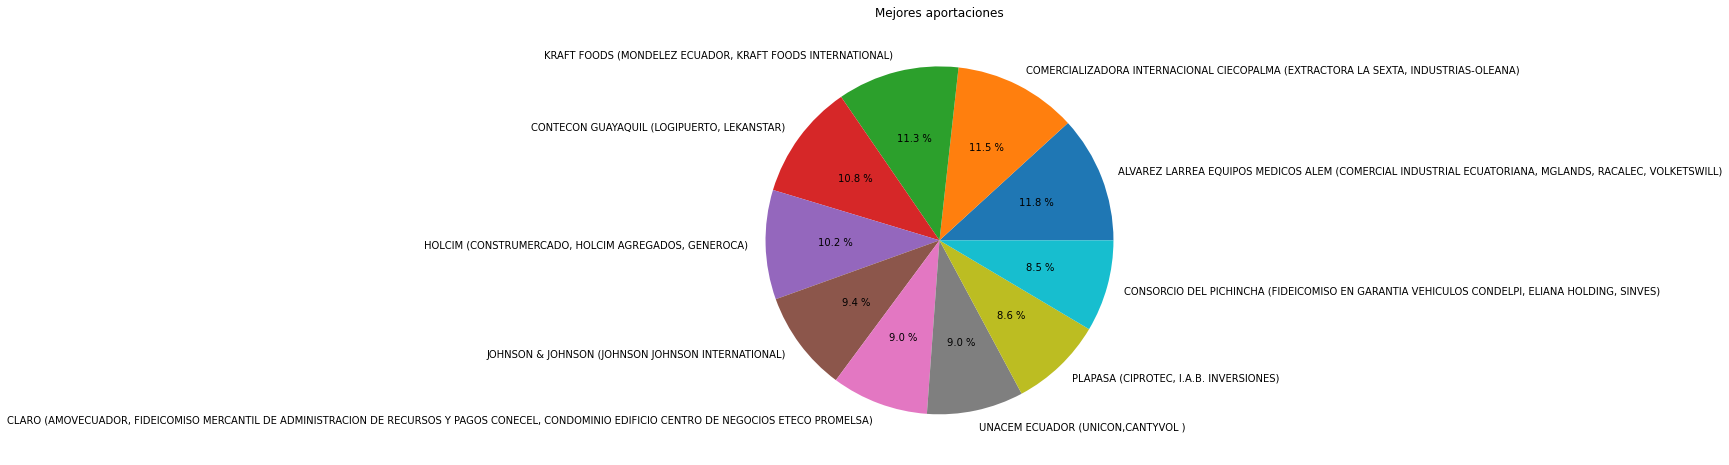

In [141]:
pesos = new_valores_2
categorias = [my_top[0][0],my_top[1][0],my_top[2][0],my_top[3][0],my_top[4][0],my_top[5][0],my_top[6][0],my_top[7][0],my_top[8][0],my_top[9][0]]

plt.title('Mejores aportaciones')
plt.pie(pesos, labels = categorias, autopct="%0.1f %%")
plt.rcParams["figure.figsize"] = (10, 8)
plt.show()

### Obtener las empresas que mayor patrimonio tienen (10)

In [143]:
patrimonio = {}
for i in data.index:
  patrimonio[data['\nNombre Grupo Económico'][i]] = data['Total Patrimonio (7) 2020'][i]

In [144]:
myList = patrimonio.items()
myList = sorted(myList) 
x, y = zip(*myList)

In [145]:
sortedDict = sorted(patrimonio.items(), key=lambda x: x[1])

print(sortedDict)

[('CONSTRUCTORA NORBERTO ODEBRECHT DEL ECUADOR CNODE (CON, CBPO ENGENHARIA)', '-24.625.312'), ('TELEAMAZONAS (DIARIO HOY, EL POPULAR)', '-3.011.871'), ('ESEICO (CONSERMIN, CONSORCIO DE PUERTOS ARTESANALES, CONSORCIO ESECON, CONSORCIO RIO MATAJE)', '-4.353.044'), ('COMERCIALIZADORA INTERNACIONAL CIECOPALMA (EXTRACTORA LA SEXTA, INDUSTRIAS-OLEANA)', '-7.100.702'), ('EXORBAN (EXPORTMARSA, CLUB DEPORTIVO ESPECIALIZADO FORMATIVO RIVERAS DEL LAGO, ALFAINVEST)', '1.022.284'), ('OCP ECUADOR (ANDES PETROLEUM, CONSORCIO B-16, OPIC, SINOPEC SERVICE, PETROORIENTA, AMODAIMI OIL COMPANY, REPSOL)', '1.282.070.968'), ('SERVICIOS DRILLING TECHNOLOGIES (PETROKEM LOGGING SERVICES, PERFOLOG ECUADOR, HIDROPROAZ)', '1.846.793'), ('ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA, NEOHYUNDAI, AYMESA, ASIAUTO, AVIANCA - ECUADOR)', '1.878.733.441'), ('EMPACRECI (LOGISFERDERASA, MARCRESCISA, EXSA, ACUAFERANT)', '10.403.412'), ('PROPEMAR (TUNAQUICK, DIVA, ACUICOLASMANABITAS)', '10.558.436'), ('DURALUM (PROALUM, WI

In [146]:
cont = 1
my_top_patrimonio = []
for i in reversed(sortedDict):
    if cont <= 10:
      my_top_patrimonio.append(i)
      cont += 1

In [151]:
new_valores_patrimonio = []
for i in my_top_patrimonio:
  valor = i[1].replace('.','')
  v = int(valor)
  new_valores_patrimonio.append(v)

print(new_valores_patrimonio)

[99911972, 98043133, 96601476, 952222, 95945105, 90279924, 90220819, 9896548, 9329305, 9069588]


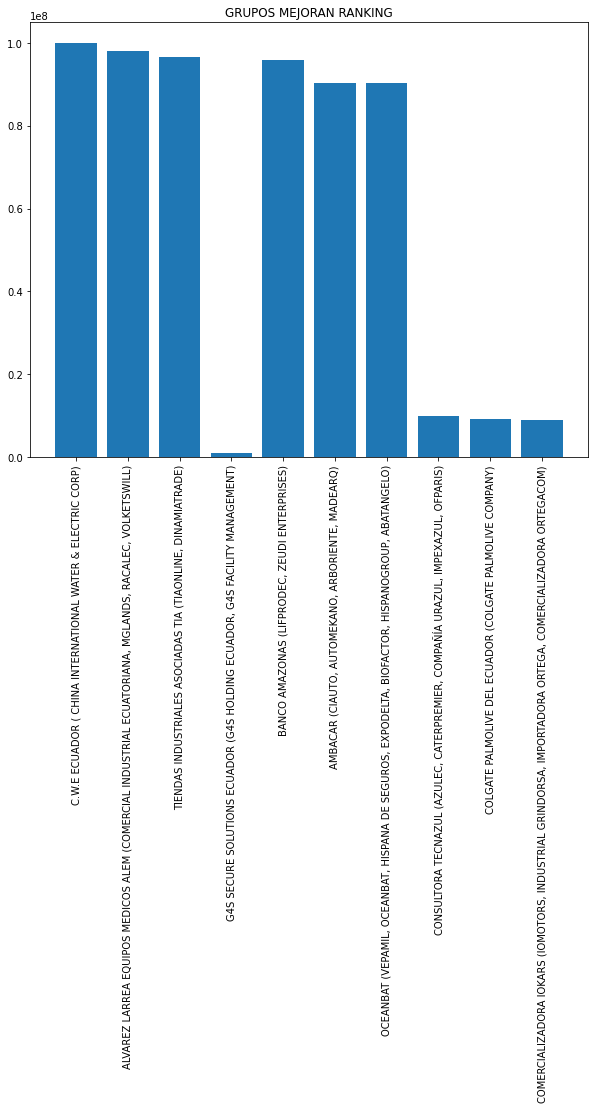

In [158]:
x = [my_top_patrimonio[0][0],my_top_patrimonio[1][0],my_top_patrimonio[2][0],my_top_patrimonio[3][0],my_top_patrimonio[4][0],my_top_patrimonio[5][0],my_top_patrimonio[6][0],my_top_patrimonio[7][0],my_top_patrimonio[8][0],my_top_patrimonio[9][0]]
y = new_valores_patrimonio

plt.title('GRUPOS MEJORAN RANKING')

plt.bar(x, y)

plt.xticks(rotation=90)

plt.show()

### Conclusiones:

#### El manejo de datos masivo es verdaderamente aprovechado cuando generamos conocimientos a partir del mismo

#### Las potencialidades de python son aprobechadas en el presente informe para generar dicho conocimiento

#### Existen un gran número de empresas que cuentan con panama papers, mientras que las contribuciones con el el estado no es muy significativa.